In [1]:
from main import solver
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
def sir_model(x, t, beta, gamma, n):
    s,i,r = x
    
    dsdt = - beta * (s/n) * i
    didt = + beta * (s/n) * i - gamma * i
    drdt = + gamma * i
    
    return np.array([dsdt, didt, drdt])


def extended_model(x, t, beta0, eta, gamma, n):
    s,e,i,r = x
    beta = beta0 * (np.sin((2*np.pi/365.25) * t) + 1)
    dsdt = - beta * (s/n) * i
    dedt = + beta * (s/n) * i - eta * e
    didt = + eta * e - gamma * i
    drdt = + gamma * i
    
    return np.array([dsdt, dedt, didt, drdt])

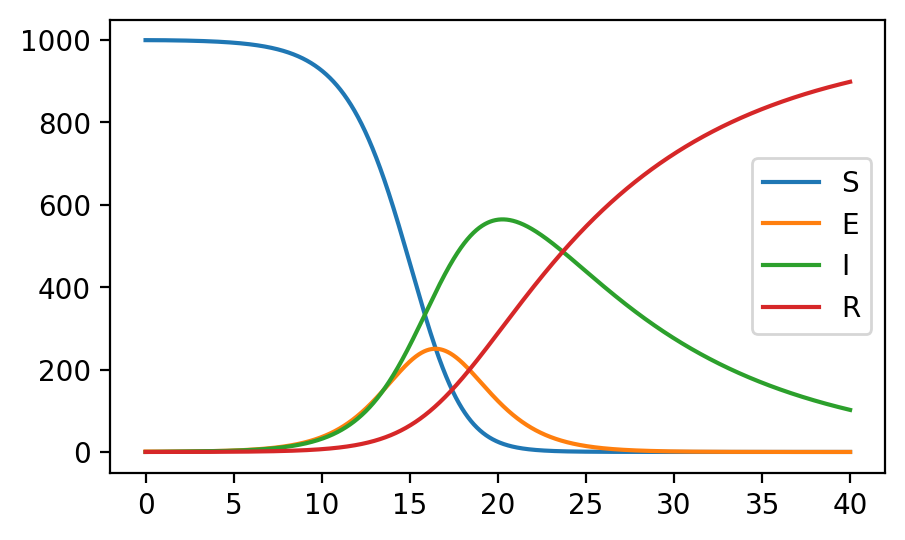

In [3]:
model = solver(extended_model, [999,1,0,0], 40, 0.01, [1, 0.5, 0.1, 1000], ['S','E','I','R'])
model.solve(method='euler')
model.show(dpi=200)